In [ ]:
'''
주제: 지능지수로 초과수익을 얻자
  포트폴리오를 구성하고, 수익률을 확인하는 것이 목적


선정이유: '지능의 역설' -> 지능 높은 사람들의 특징 소개하는데 지능이 높을수록 우리 몸에 탑재된 DNA에 반하는 행동을 한다는 것이다. 즉 보통의 인간은 위험회피적인 성향을 가지고 있지만, 지능이 높을수록 그렇지 않게 행동할 확률이 크다.
따라서 이를 투자 시장에 적용한다. 지능지수가 높아짐에 따라 투자 시장에서는 경기의 일반적인 흐름과 반대되는 행위자들이 많아질 것이다. 따라서 경기가 좋지 않을 때 보통은 주식을 팔지만 지능지수가 높아짐을 확인하면 사람들은 위험을 감수하고 
팔지 않을 수 있다. 그럼 여기에서 차익거래를 실현하는 것이다. 
경기 하락 + 지능지수 높음 - 주식 매수 비율 상승, 경기 하락 + 지능지수 낮음 - 주식 매수 비율 하락
경기 상승 + 지능지수 높음 - 주식 매도 비율 상승, 경기 상승 + 지능지수 낮음 - 주식 매도 비율 하락
'''

In [100]:
#pip install QuantStats --quiet
#pip install yfinance --quiet

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.optimize import minimize 
import quantstats as qs
sns.set() # 기본 스타일로 지정

In [102]:
def get_etf_price_data(tickers):
  etf = yf.Tickers(tickers)
  data = etf.history(start='2002-01-01', end='2023-05-28',actions=False) # actions=False -> capital gains, dividends, stock splits 정보 안들어옴
  data.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True) # Close만 남겨둠
  data = data.droplevel(0, axis=1)
  data.ffill(inplace=True) 
  df = data.resample('MS').last()
  return df



In [103]:
# 알코올 판매량 위한 기업 주가 수집

tickers = ['DEO', 'BUD', 'HEIO.AS', '0291.HK', 'RI.PA', 'TAP', '2502.T', 'TBVPF', 'KNBWY']

alcohol_data = get_etf_price_data(tickers)

alcohol_data.head()

[*********************100%***********************]  9 of 9 completed


,0291.HK,2502.T,BUD,DEO,HEIO.AS,KNBWY,RI.PA,TAP,TBVPF
Date,,,,,,,,,
2002-01-01,2.397778,774.380920,NaN,24.541817,NaN,5.982697,21.585135,16.780647,NaN
2002-02-01,2.364931,729.949402,NaN,25.290747,NaN,5.801512,22.721193,19.345589,NaN
2002-03-01,2.397778,751.107483,NaN,27.817766,NaN,6.154066,23.099884,21.570774,NaN
2002-04-01,2.479893,834.328857,NaN,28.019224,NaN,6.783307,25.876921,21.372549,NaN
2002-05-01,3.022784,834.328857,NaN,26.948294,NaN,7.562493,24.273811,21.402573,NaN


In [104]:
# 커피 판매량 위한 기업 주가 수집

tickers = ['SBUX', 'NSRGY', 'KO', 'TATACONSUM.NS']

coffee_data = get_etf_price_data(tickers)

print(coffee_data)

[*********************100%***********************]  4 of 4 completed
                   KO       NSRGY        SBUX  TATACONSUM.NS
Date                                                        
2002-01-01  11.885546   12.019080    4.725348      10.977636
2002-02-01  12.874429   12.343921    4.574263      11.819265
2002-03-01  14.256749   12.455933    4.598119      11.242716
2002-04-01  15.143358   13.388303    4.536495      11.027337
2002-05-01  15.157001   13.730132    4.826733      10.819683
...               ...         ...         ...            ...
2023-01-01  60.853226  119.211945  108.057793     721.559448
2023-02-01  59.057003  109.750671  101.584175     707.513977
2023-03-01  62.029999  118.694992  103.614075     701.134155
2023-04-01  64.150002  128.259995  113.723732     755.535522
2023-05-01  60.259998  123.959999   98.529999     789.700012

[257 rows x 4 columns]


In [105]:
# 흡연율 판매량 위한 기업 주가 수집

tickers = ['PM', 'BTI', 'IMBBY', 'MO', '033780.KS', 'EML', 'ITC.NS', 'GODFRYPHLP.NS']

smocking_data = get_etf_price_data(tickers)

print(smocking_data)

[*********************100%***********************]  8 of 8 completed
               033780.KS        BTI        EML  GODFRYPHLP.NS      IMBBY  \
Date                                                                       
2002-01-01   6417.937988   2.921590   5.519574      50.396500   3.310261   
2002-02-01   6263.753906   3.109647   5.948066      50.091457   3.445915   
2002-03-01   6572.122559   3.341746   6.534776      50.117992   4.234497   
2002-04-01   7131.041992   3.544277   6.271767      46.417828   4.282593   
2002-05-01   6263.753906   4.176311   6.276134      52.922951   5.109058   
...                  ...        ...        ...            ...        ...   
2023-01-01  92500.000000  37.744450  21.449883    1923.199951  24.201488   
2023-02-01  88700.000000  37.322777  20.663809    1775.500000  23.976017   
2023-03-01  83900.000000  35.119999  19.352451    1819.750000  22.810310   
2023-04-01  85800.000000  37.049999  17.544369    1770.300049  24.558870   
2023-05-01  83500.0

In [106]:
# 전기 판매량 위한 기업 주가 수집

tickers = ['DUK', 'EXC', 'NEE', 'SO', 'D', 'AEP', 'XEL', 'ETR', 'PCG', 'PPL']

electronic_data = get_etf_price_data(tickers)

print(electronic_data)

[*********************100%***********************]  10 of 10 completed
                  AEP          D         DUK         ETR        EXC  \
Date                                                                  
2002-01-01  16.842045  12.420753   21.937231   17.931471   7.922260   
2002-02-01  17.953619  12.433833   22.386185   18.119732   7.996674   
2002-03-01  18.870756  13.901656   23.971628   19.054688   8.595449   
2002-04-01  18.752008  14.170469   24.307732   20.367147   8.811270   
2002-05-01  17.724453  13.956335   20.451900   19.445990   8.748623   
...               ...        ...         ...         ...        ...   
2023-01-01  92.258499  62.028217  100.384659  106.105278  41.472519   
2023-02-01  87.177567  54.211330   93.304466  101.835793  40.047710   
2023-03-01  90.170357  55.167202   95.492065  106.656822  41.535000   
2023-04-01  91.587471  56.380863   97.877632  106.498436  42.080338   
2023-05-01  82.250000  49.197582   88.699997   96.800003  39.389999   

     

In [107]:
# NaN -> 0

alcohol_data.fillna(0, inplace=True)
coffee_data.fillna(0, inplace=True)
smocking_data.fillna(0, inplace=True)
electronic_data.fillna(0, inplace=True)



In [108]:
# 데이터 axis=1로 총 합 구하기 및 df 생성

alcohol_sum = alcohol_data.sum(axis=1)
coffee_sum = coffee_data.sum(axis=1)
smocking_sum = smocking_data.sum(axis=1)
electronic_sum = electronic_data.sum(axis=1) 

df = pd.concat([alcohol_sum, coffee_sum, smocking_sum, electronic_sum], axis=1)

In [109]:
df.rename(columns={0:'alcohol', 1:'coffee', 2:'smoking', 3:'electronic'}, inplace=True)

In [110]:
print(df['smoking'], smocking_sum, sep= ' ')


Date
2002-01-01     6493.160373
2002-02-01     6340.274876
2002-03-01     6649.678952
2002-04-01     7204.087478
2002-05-01     6344.683039
                  ...     
2023-01-01    94998.310131
2023-02-01    91073.328070
2023-03-01    86320.054462
2023-04-01    88219.877470
2023-05-01    85959.383688
Freq: MS, Name: smoking, Length: 257, dtype: float64 Date
2002-01-01     6493.160373
2002-02-01     6340.274876
2002-03-01     6649.678952
2002-04-01     7204.087478
2002-05-01     6344.683039
                  ...     
2023-01-01    94998.310131
2023-02-01    91073.328070
2023-03-01    86320.054462
2023-04-01    88219.877470
2023-05-01    85959.383688
Freq: MS, Length: 257, dtype: float64


In [111]:
df

,alcohol,coffee,smoking,electronic
Date,,,,
2002-01-01,845.668994,39.607611,6493.160373,120.603871
2002-02-01,805.473374,41.611878,6340.274876,121.048283
2002-03-01,832.147750,42.553517,6649.678952,130.905094
2002-04-01,918.860751,44.095493,7204.087478,133.759011
2002-05-01,917.538813,44.533550,6344.683039,123.815123
...,...,...,...,...
2023-01-01,4907.575809,1009.682411,94998.310131,655.739716
2023-02-01,5450.364272,977.905827,91073.328070,616.127789
2023-03-01,5593.244240,985.473221,86320.054462,645.937464


In [112]:
df_pct = df.pct_change().fillna(0)
df_pct

,alcohol,coffee,smoking,electronic
Date,,,,
2002-01-01,0.000000,0.000000,0.000000,0.000000
2002-02-01,-0.047531,0.050603,-0.023546,0.003685
2002-03-01,0.033116,0.022629,0.048800,0.081429
2002-04-01,0.104204,0.036236,0.083374,0.021801
2002-05-01,-0.001439,0.009934,-0.119294,-0.074342
...,...,...,...,...
2023-01-01,0.037469,-0.022047,0.010297,-0.027038
2023-02-01,0.110602,-0.031472,-0.041316,-0.060408
2023-03-01,0.026215,0.007738,-0.052192,0.048382


In [113]:
df = df_pct

# 기술통계


In [114]:
# 비율척도 기술통계량:사칙연산이 모두 가능한 변수 
# 빈도분석(기초통계분석): 가장 기초적, 간단한 분석방법으로 변수의 분포를 제공하며 인구 통계적 특성 제시
# 요인분석: 측정하려는 변수들의 상관관계가 높은 것끼리 묶어서 변수를 단순화하는 데 이용(타당성 검정), 잘못 적재된 변수나 설명력이 부족한 변수 제거
# 신뢰도분석: 요인 분석으로 추출된 요인들이 동질적인 변수들로 구성되어 있는가를 파악하는 분석 방법
# 상관관계분석: 설정한 가설을 검정하기 전에 모든 연구가설에 사용되는 측정 변수 간의 관계 정도를 제시하여 변수 간의 관련성에 대한 윤곽 제시(피어슨)
# 회귀분석: 독립변수가 종속변수에 어떠한 영향 미치는지 파악하기 위해 실시하는 분석(두 변수 인과관계 분석)



In [115]:
# 요약 통계량 구하기
df.describe()

# 각 섹터마다의 시장 규모가 차이 나는 걸 확인 할 수 있음
# 각 변수마다 스케일의 범위가 다르기에 스케일링 조정이 필요

,alcohol,coffee,smoking,electronic
count,257.000000,257.000000,257.000000,257.000000
mean,0.009395,0.014527,0.011604,0.007240
std,0.058457,0.057111,0.055329,0.043075
min,-0.175137,-0.185330,-0.177705,-0.134362
25%,-0.020358,-0.024299,-0.022680,-0.015094
50%,0.010372,0.013454,0.010297,0.012549
75%,0.047932,0.050603,0.040369,0.035839
max,0.244963,0.177653,0.227707,0.115768


In [116]:
# # scale
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(df)
# df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)
# print(df_scaled.describe())

In [117]:
# df_scaled

In [118]:
# 결측치 확인
print(df.isnull().sum())

alcohol       0
coffee        0
smoking       0
electronic    0
dtype: int64


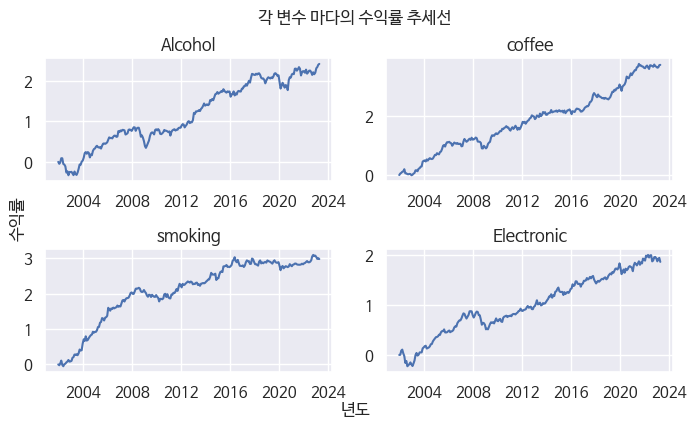

In [171]:
import matplotlib.pyplot as plt

df_scaled = df
fig, axs = plt.subplots(2, 2, figsize=(7, 4))

axs[0,0].plot(df_scaled.index, df_scaled['alcohol'].cumsum())
axs[0,0].set_title('Alcohol')

axs[0,1].plot(df_scaled.index, df_scaled['coffee'].cumsum())
axs[0,1].set_title('coffee')

axs[1,0].plot(df_scaled.index, df_scaled['smoking'].cumsum())
axs[1,0].set_title('smoking')

axs[1,1].plot(df_scaled.index, df_scaled['electronic'].cumsum())
axs[1,1].set_title('Electronic')

fig.text(0.5, 0.02, '년도', ha='center', va='center')
fig.text(0.02, 0.5, '수익률', ha='center', va='center', rotation='vertical')
fig.text(0.5, 1, '각 변수 마다의 수익률 추세선', ha='center', va='center')

plt.tight_layout()
plt.show()

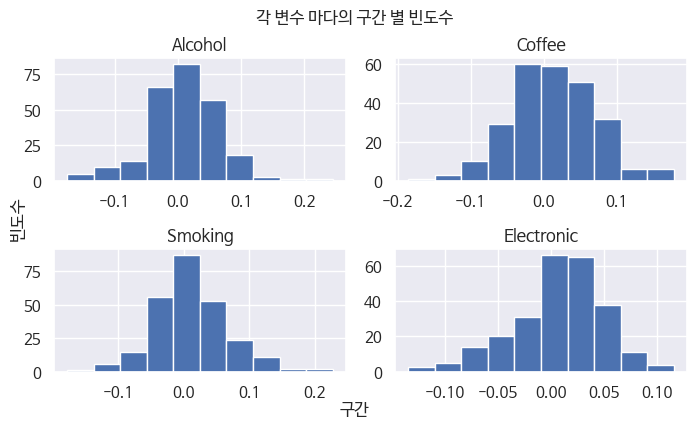

In [120]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기
plt.rc("axes", unicode_minus = False)

fig, axs = plt.subplots(2, 2, figsize=(7, 4))

axs[0, 0].hist(df_scaled['alcohol'])
axs[0, 0].set_title('Alcohol')

axs[0, 1].hist(df_scaled['coffee'])
axs[0, 1].set_title('Coffee')

axs[1, 0].hist(df_scaled['smoking'])
axs[1, 0].set_title('Smoking')

axs[1, 1].hist(df_scaled['electronic'])
axs[1, 1].set_title('Electronic')

fig.text(0.5, 0.02, '구간', ha='center', va='center')
fig.text(0.02, 0.5, '빈도수', ha='center', va='center', rotation='vertical')
fig.text(0.5, 1, '각 변수 마다의 구간 별 빈도수', ha='center', va='center')


plt.tight_layout()
plt.show()

# 추세선, 빈도 그래프를 보니 분포도가 유사한 것을 알 수 있다. 따라서 독립 변수 추출하기 위한 PCA 필요해 보인다.
# 또한, 주식 데이터의 분포가 정규분포를 갖지 않는다. 


In [121]:
# 그럼 4개의 변수의 주 별 수익률이 모두 양수 일 때 SPY 지수도 양수일까?
# 가설: 4개의 변수가 가각 수익률 양수 일 때 spy 수익률 상승하는 빈도수는?


# 칼럼 별 일주일 별 수익률 구하기 
#rets = df.pct_change().dropna()

# SPY 주 별 수익률 구하기

etf = yf.Ticker("SPY")
data = etf.history(start='2002-01-01', end='2023-05-28',actions=False) # actions=False -> capital gains, dividends, stock splits 정보 안들어옴
data.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True) # Close만 남겨둠
#data = data.droplevel(0, axis=1)
data.ffill(inplace=True) 
spy_data = data.resample('MS').last()
spy_data = spy_data.pct_change().fillna(0)
spy_data.index = df_scaled.index
  
# 합치기
df_scaled['spy'] = spy_data
rets = df_scaled
print(rets)



             alcohol    coffee   smoking  electronic       spy
Date                                                          
2002-01-01  0.000000  0.000000  0.000000    0.000000  0.000000
2002-02-01 -0.047531  0.050603 -0.023546    0.003685 -0.017936
2002-03-01  0.033116  0.022629  0.048800    0.081429  0.033271
2002-04-01  0.104204  0.036236  0.083374    0.021801 -0.058156
2002-05-01 -0.001439  0.009934 -0.119294   -0.074342 -0.005933
...              ...       ...       ...         ...       ...
2023-01-01  0.037469 -0.022047  0.010297   -0.027038  0.062887
2023-02-01  0.110602 -0.031472 -0.041316   -0.060408 -0.025143
2023-03-01  0.026215  0.007738 -0.052192    0.048382  0.037078
2023-04-01  0.059223  0.077319  0.022009    0.020480  0.015975
2023-05-01  0.020964  0.010155 -0.025623   -0.079781  0.009833

[257 rows x 5 columns]


In [122]:
# 각 칼럼별 수익률 (양수 음수) 0~4 빈도수일 때의 SPY 수익률(양수 음수) 빈도수 구하기


lst = {0:0,1:0,2:0,3:0,4:0}
for _, row in rets.iterrows():
    cnt = 0
    if (row['alcohol'] > 0):
        cnt +=1
    if (row['coffee'] > 0):
        cnt +=1
    if (row['smoking'] > 0):
        cnt +=1
    if (row['electronic'] > 0):
        cnt +=1
    if (row['spy'] > 0):
        lst[cnt] +=1
        
print("각 변수가 양수일 때의 빈도에 대한 spy 양수 빈도수")
print(lst)
print()
        

lst2 = {0:0,1:0,2:0,3:0,4:0}
for _, row in rets.iterrows():
    cnt = 0
    if (row['alcohol'] < 0):
        cnt +=1
    if (row['coffee'] < 0):
        cnt +=1
    if (row['smoking'] < 0):
        cnt +=1
    if (row['electronic'] < 0):
        cnt +=1
    if (row['spy'] < 0):
        lst2[cnt] +=1

print("각 변수가 음수일 때의 빈도에 대한 spy 음수 빈도수")
print(lst2)
print()


lst3 = {0:0,1:0,2:0,3:0,4:0}
for _, row in rets.iterrows():
    cnt = 0
    if (row['alcohol'] > 0):
        cnt +=1
    if (row['coffee'] > 0):
        cnt +=1
    if (row['smoking'] > 0):
        cnt +=1
    if (row['electronic'] > 0):
        cnt +=1
    if (row['spy'] < 0):
        lst3[cnt] +=1
     
print("각 변수가 양수일 때의 빈도에 대한 spy 음수 빈도수")   
print(lst3)
print()


lst4 = {0:0,1:0,2:0,3:0,4:0}
for _, row in rets.iterrows():
    cnt = 0
    if (row['alcohol'] < 0):
        cnt +=1
    if (row['coffee'] < 0):
        cnt +=1
    if (row['smoking'] < 0):
        cnt +=1
    if (row['electronic'] < 0):
        cnt +=1
    if (row['spy'] > 0):
        lst4[cnt] +=1
        
print("각 변수가 음수일 때의 빈도에 대한 spy 양수 빈도수")
print(lst4)
print()
# 4개 종목이 종속변수랑 관련이 없지 않나락라고 생각할 수 있지? 비중이 적은데 인과성이 있을 수 있냐.

# 시장에서 작은 종목들을 선택했는데 변화량이 SPY와 관련성이 있나.


각 변수가 양수일 때의 빈도에 대한 spy 양수 빈도수
{0: 5, 1: 19, 2: 42, 3: 58, 4: 44}

각 변수가 음수일 때의 빈도에 대한 spy 음수 빈도수
{0: 9, 1: 16, 2: 25, 3: 26, 4: 11}

각 변수가 양수일 때의 빈도에 대한 spy 음수 빈도수
{0: 11, 1: 26, 2: 25, 3: 16, 4: 9}

각 변수가 음수일 때의 빈도에 대한 spy 양수 빈도수
{0: 44, 1: 58, 2: 42, 3: 19, 4: 5}



In [123]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

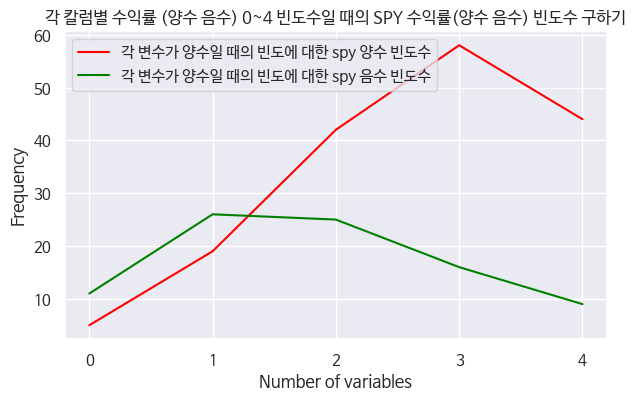

In [124]:
# 위 4가지 경우 추세 보기 위해 그래프 그리기
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기
plt.rc("axes", unicode_minus = False)

plt.figure(figsize=(7,4))
x = list(lst.keys())

plt.plot(x, lst.values(), label='각 변수가 양수일 때의 빈도에 대한 spy 양수 빈도수', color='red')
#plt.plot(x, lst2.values(), label='각 변수가 음수일 때의 빈도에 대한 spy 음수 빈도수', color='blue')
plt.plot(x, lst3.values(), label='각 변수가 양수일 때의 빈도에 대한 spy 음수 빈도수', color='green')
#plt.plot(x, lst4.values(), label='각 변수가 음수일 때의 빈도에 대한 spy 양수 빈도수', color='black')

plt.xlabel('Number of variables')
plt.ylabel('Frequency')
plt.title('각 칼럼별 수익률 (양수 음수) 0~4 빈도수일 때의 SPY 수익률(양수 음수) 빈도수 구하기')
plt.xticks(x)
plt.legend()
plt.show()

# 각 칼럼별 수익률 (양수 음수) 0~4 빈도수일 때의 SPY 수익률(양수 음수) 빈도수 구하기에서, 
# 각 변수가 음수일 때보다 양수인 빈도가 높아질수록 SPY의 양의 빈도수도 높아지는 추세인 걸 확인할 수 있었다.
# 따라서 4개의 변수와 타겟변수인 SPY종가 데이터와 관련성이 있다고 볼 수 있다.

# 상관관계 분석

,alcohol,coffee,smoking,electronic,spy
alcohol,1.000000,0.324390,0.178048,0.290029,0.350845
coffee,0.324390,1.000000,0.185072,0.377345,0.523761
smoking,0.178048,0.185072,1.000000,0.240025,0.086377
electronic,0.290029,0.377345,0.240025,1.000000,0.479518
spy,0.350845,0.523761,0.086377,0.479518,1.000000


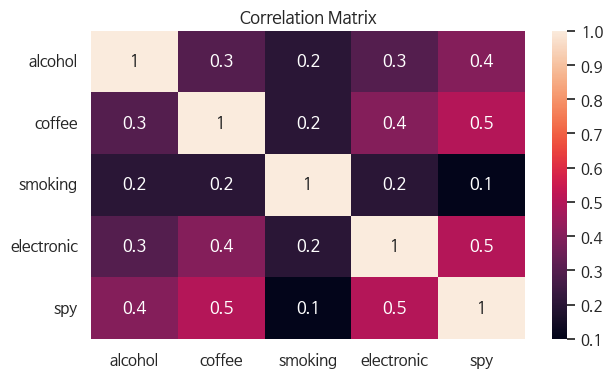

In [125]:
# 상관관계 파악
corr = rets.corr()
plt.figure(figsize=(7,4))
plt.title("Correlation Matrix")
sns.heatmap(np.round(corr,1), annot=True)
# 상관관계 분석에서도 coffee와 electronic의 상관계수가 0.4로 나타난다. 이는 두 변수 coffee와 electronic를
# 하나의 변수 Factor1로 축소할 수 있다는 걸 알 수 있다.
# 다중공선성 및 차원의 저주 해결 위해 독립변수들 축소
corr

# 요인 분석

In [126]:
# 요인분석은 데이터를 축소하는 변수의 정제과정이다. 즉 여러 가지 항목들을 비슷한 항목으로 묶는 것으로, 여러 변수 사이 존재하는 
# 상호관계를 분석하여 타당성 검정하고 공통으로 속해있는 차원이나 요인들을 밝혀내어 변수 축소하는 작업
# 활용방안: 타당성 검정(측정 도구가 정확히 측정했는지를 알아보기 위해 측정변수들이 동일한 요인으로 묶이는지 검정), 
# 변수 축소(변수들의 상관관계가 높은 것끼리 묶어서 변수를 정제), 변수제거(변수의 중요도를 나타내는 요인적재량이 0.4미만이면 설명력이
# 부족한 요인으로 판단하여 제거), 요인 분석에서 얻어지는 결과를 이용해 상관분석이나 회귀분석의 설명변수로 활용



Text(0, 0.5, 'Cumulative Explained Variance Ratio')

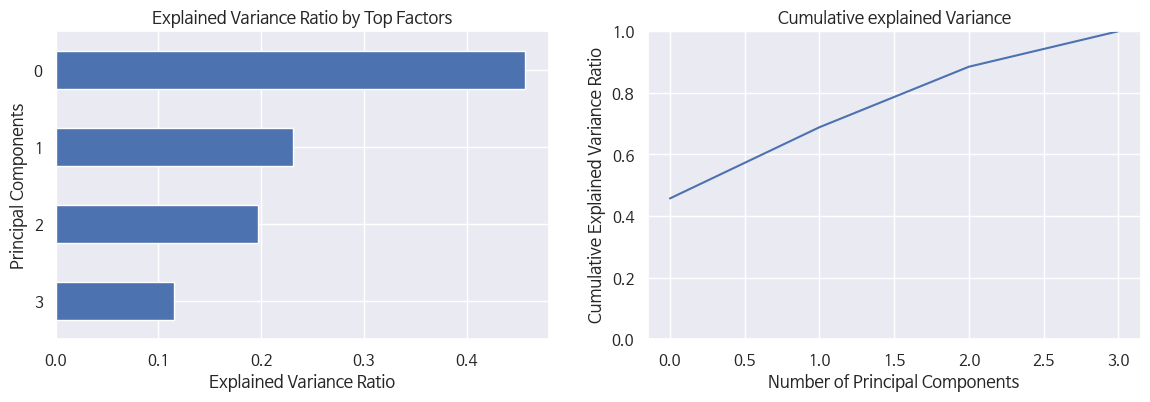

In [169]:
# 주성분 분석을 통해 요인의 수 가정
from sklearn.decomposition import PCA
pca = PCA()
pca = pca.fit(rets.iloc[:,:-1])

fig, axes = plt.subplots(ncols=2, figsize=(14,4))

series1 = pd.Series(pca.explained_variance_ratio_).sort_values()
series2 = pd.Series(pca.explained_variance_ratio_).cumsum()

series1.plot.barh(title='Explained Variance Ratio by Top Factors', ax=axes[0])
axes[0].set_xlabel('Explained Variance Ratio')
axes[0].set_ylabel('Principal Components')

series2.plot(ylim=(0,1),ax=axes[1], title='Cumulative explained Variance')
axes[1].set_xlabel('Number of Principal Components')
axes[1].set_ylabel('Cumulative Explained Variance Ratio')

# PCA_0 ~ PCA_2의 변동량 합이 80% 이상 차지하고 있다. 따라서 4개의 성분 중 일단 주성분 변수를 3개로 가정할 수 있다.

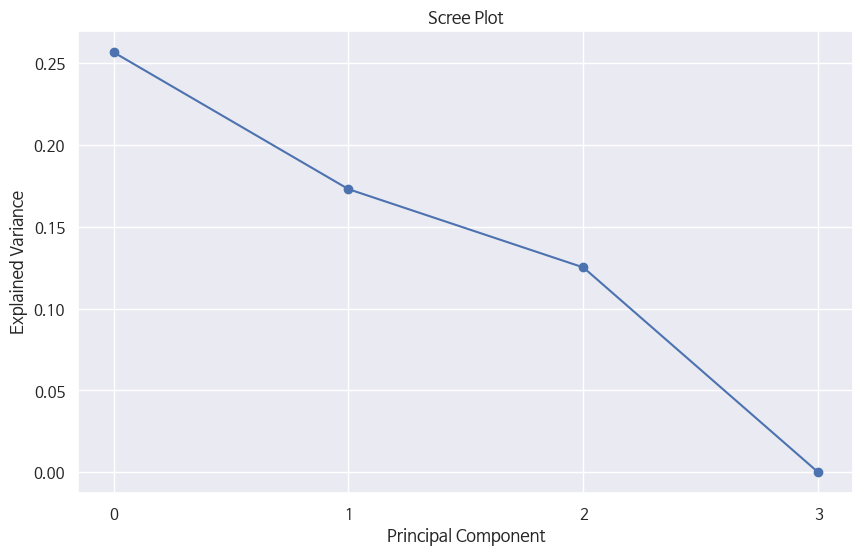

In [128]:
# scree plot을 통해 고유값이 급격히 감소하는 구간을 확인한다.
from sklearn.decomposition import PCA
pca = PCA()
pca = pca.fit(rets.iloc[:,:-1].corr())
explained_variance = pd.Series(pca.explained_variance_).sort_values()
explained_variance.plot(marker='o')
plt.xlabel('Principal Component')
plt.xticks([0,1,2,3])
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

In [129]:
from factor_analyzer import FactorAnalyzer

# 요인 분석 수행
# 주성분 분석의 가정에 의해 3개 요인으로 분석
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(rets.iloc[:,:-1])

# 로드링 값 확인
loadings = fa.loadings_
df_fa = pd.DataFrame(loadings, index=rets.columns[:-1], columns = ['Factor 1', 'Factor 2', 'Factor 3'])
print(df_fa)
# 각 변수와 해당 요인 간의 상관관계 계수를 나타낸 것이다. Factor 1은 coffee, electronic변수가 적재값이 가장 높은 것으로
# 나타는다. 적재값이 높다는 것은 해당 변수들이 해당 요인으로 잘 설명된다는 의미이다. Factor 2는 smoking, Factor 3은 alcohol
# 변수가 적재값이 가장 높게 나타낸다. 따라서 Factor 1~3요인으로 4개 변수를 3개로 축소할 수 있는 근거를 제시한다.



            Factor 1  Factor 2  Factor 3
alcohol     0.225468  0.472599  0.222623
coffee      0.496808  0.356606  0.196932
smoking     0.122273  0.142887  0.372593
electronic  0.447982  0.202322  0.419586


In [130]:
print("각 요인이 설명하는 변동의 비율을 나타내며, 요인의 중요성을 평가하는 데 사용")
print(fa.get_factor_variance())
print()
print("각 변수의 공통성(신뢰도)을 확인. 이는 각 변수가 추출된 요인에 얼마나 잘 설명되는지를 나타내는 척도")
print(fa.get_communalities())


각 요인이 설명하는 변동의 비율을 나타내며, 요인의 중요성을 평가하는 데 사용
(array([0.51329246, 0.41186817, 0.40322156]), array([0.12832311, 0.10296704, 0.10080539]), array([0.12832311, 0.23129016, 0.33209555]))

각 변수의 공통성(신뢰도)을 확인. 이는 각 변수가 추출된 요인에 얼마나 잘 설명되는지를 나타내는 척도
[0.32374663 0.41276824 0.17419321 0.41767412]


In [131]:
# Factor 1~3 변수 및 spy 저장
fa_scores = fa.transform(rets.iloc[:,:-1])
df_fa = pd.DataFrame(fa_scores, columns=['Factor 1', 'Factor 2', 'Factor 3'], index=rets.index)
df_fa['spy'] = rets['spy']
df_fa

,Factor 1,Factor 2,Factor 3,spy
Date,,,,
2002-01-01,-0.146064,-0.126770,-0.125929,0.000000
2002-02-01,0.213641,-0.264129,-0.285579,-0.017936
2002-03-01,0.571383,0.206241,0.792137,0.033271
2002-04-01,0.245469,0.768257,0.601519,-0.058156
2002-05-01,-0.554799,-0.158743,-1.307401,-0.005933
...,...,...,...,...
2023-01-01,-0.478157,0.049489,-0.229912,0.062887
2023-02-01,-0.732443,0.481850,-0.650041,-0.025143
2023-03-01,0.280255,0.045776,0.017166,0.037078


<Axes: title={'center': 'Correlation Matrix'}>

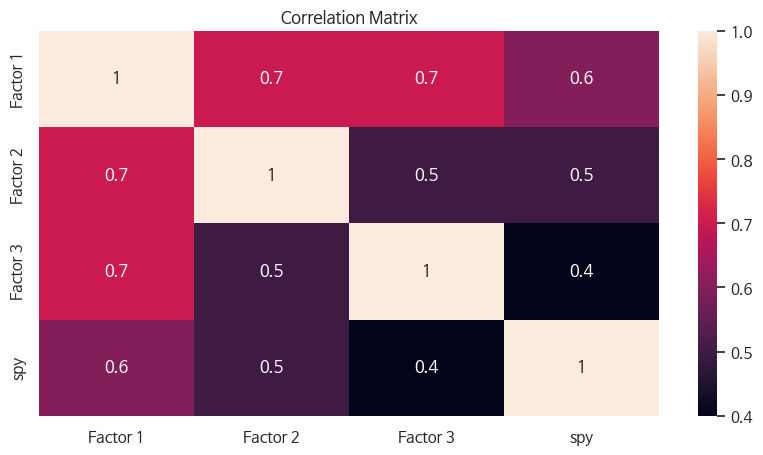

In [132]:
# 독립된 변수들과 종속변수 간 상관성 구하기
# 상관관계 파악
corr = df_fa.corr()
plt.figure(figsize=(10,5))
plt.title("Correlation Matrix")
sns.heatmap(np.round(corr,1), annot=True)


# 회귀분석

In [133]:
# 회귀분석: 독립변수가 종속변수에 어떠한 영향 미치는지 파악하기 위해 실시하는 분석(두 변수 인과관계 분석)
# 선형성: 독립변수와 종속변수가 선형적이어야 한다.(회귀선 확인)
# 잔차 정규성: 잔차는 종속변수의 관측값과 회귀모델의 예측값 간의 차이를 말하며, 잔차의 기대값은 0이며, 정규분포를 이뤄야 한다.(정규성 검정 확인)
# 잔차 독립성: 잔차들은 서로 독립적이어야 한다.(더빈-왓슨 값 확인)
# 잔차 등분산성: 잔차들의 분산이 일정해야 한다.(표준잔차와 표준예측치 도표)
# 다중 공선성: 다중 회귀분석을 수행할 경우 3개 이상의 독립변수 간의 강한 상관관계로 인한 문제가 발생하지 않아야 한다.(분산팽창요인VIF확인)

# 회귀 분석을 위해서 위와 같은 기본적인 가정이 충족되어야 회귀분석 수행 가능.

# 단계
# 회귀분석의 기본 가정이 충족되는지 확인
# 분산분석의 F값으로 회귀모형의 유의성 여부 판단
# 독립변수와 종속변수 간 상관관계와 회귀모형의 설명력 확인
# 검정 통계량 t-값에 대한 유의확률을 통해 가설의 채택 여부 결정
# 회귀방정식을 적용해 회귀식 수립하고 결과 해석


# S&P의 업종 비중은 IT 30%, Health care  15%이다. SPY 500는 가중평균으로 계산되기에 비중이 높은 업종이 오를수록
# 오른다. 알코올, 커피, 담배는 소비자 자유재량(Consumer Discretionary 10%) 업종에, 전기는 에너지 업종(2%)에 속한다.
# 업종이 다르고 상품이 다르기에 여러 개의 변수가 동시에 SPY 종속변수에 영향을 미치는지 확인하기 위해 다중 회귀분석을 실시한다. 
# 또한 비중이 적은데 다른 업종들이 떨어지면 알코올, 커피, 전기, 담배 업종 오르더라도 S&P 떨어지지 않냐라는 의문이 있기에 
# 실제로 3개 독립된 변수가 오르면 종속변수가 오르는지에 대한 회귀분석을 실시한다.

# 대립가설: 알코올, 커피, 전기, 담배의 독립변수가 오르면 SPY가 오른다.
# 귀무가설: 알코올, 커피, 전기, 담배의 독립변수가 오르면 SPY가 오르지 않는다.

# 다중회귀분석: 한 독립변수의 값이 증가할 때 다른 독립변수의 값이 이와 관련하여 증가하거나 감소하는 현상. 
# 대부분 다중회귀분석에서 독립변수들은 어느 정도 상관관계를 보이고 있기에 다중 공선성은 존재하지만,
# 독립변수들이 강한 상관관계를 보이는 경우 회귀분석의 결과를 신뢰하기 어렵다. 
# Factor 1은 coffee, electronic, Factor 2는 smoking, Factor 3은 alcohol을 설명하므로 어떤 Factor가
# 종속변수에 영향을 미치는지를 파악하기 위해서 다중공선성 문제를 해결한다.



In [134]:
import pandas as pd
import statsmodels.api as sm

# 독립변수와 종속변수 데이터 준비
X = df_fa.iloc[:,:-1] # 독립변수
y = df_fa.iloc[:,-1]  # 종속변수

# 상수항 추가
X = sm.add_constant(X)

# 회귀분석 모델 생성
model = sm.OLS(y, X)

# 데이터 적합
results = model.fit()

# 회귀분석 결과 출력
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    spy   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     53.03
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.26e-26
Time:                        16:19:54   Log-Likelihood:                 504.44
No. Observations:                 257   AIC:                            -1001.
Df Residuals:                     253   BIC:                            -986.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0076      0.002      3.578      0.0

In [135]:
print(results.summary().tables[1])


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0076      0.002      3.578      0.000       0.003       0.012
Factor 1       0.0405      0.006      6.846      0.000       0.029       0.052
Factor 2       0.0124      0.006      2.185      0.030       0.001       0.024
Factor 3      -0.0029      0.006     -0.508      0.612      -0.014       0.008


In [136]:
'''

OLS 회귀 분석 결과를 해석해드리겠습니다. 이 모델은 종속 변수로 "spy"를 사용하고, 독립 변수로 "Factor 1", "Factor 2", "Factor 3"를 사용한 선형 회귀 모델입니다.

R-squared 값은 0.386으로, 모델이 종속 변수의 변동성의 약 38.6%를 설명할 수 있음을 나타냅니다. Adjusted R-squared 값은 0.379로, 독립 변수의 수와 관련하여 수정된 설명력을 보여줍니다.

F-통계량은 53.03이고, 그에 대한 p-값은 1.26e-26입니다. 이는 적어도 하나의 독립 변수가 종속 변수와 관련이 있다는 가설을 기각할 수 있는 충분한 증거를 제시합니다.

회귀 계수(coefficient)를 살펴보면, 상수항(const)은 0.0076입니다. "Factor 1"의 계수는 0.0405이며, 통계적으로 유의미한 값으로 나타났습니다. "Factor 2"의 계수는 0.0124로, 이 또한 통계적으로 유의미한 값입니다. 하지만 "Factor 3"의 계수는 -0.0029이며, 이 값은 통계적으로 유의미하지 않은 것으로 나타났습니다(p-value가 0.612입니다).

회귀 분석 결과의 기타 정보로는, 오차항의 공분산 구조가 비록 로버스트하지 않다는 점과, 오차항의 자기상관 구조를 파악하기 위한 Durbin-Watson 값이 2.172로 나타났습니다. 또한, 오차항의 정규성을 검정하기 위한 Jarque-Bera 통계량은 1.218이며, 이 값은 오차항이 정규분포를 따른다는 가정을 만족한다는 증거를 보여줍니다.

위 결과를 종합해보면, "Factor 1"과 "Factor 2"는 "spy"와 통계적으로 유의한 관계를 갖는 것으로 나타났습니다. 하지만 "Factor 3"은 "spy"와 관련성이 없다는 것을 나타내며, 이는 p-value가 유의수준 0.05보다 크기 때문입니다.



'''

'\n\nOLS 회귀 분석 결과를 해석해드리겠습니다. 이 모델은 종속 변수로 "spy"를 사용하고, 독립 변수로 "Factor 1", "Factor 2", "Factor 3"를 사용한 선형 회귀 모델입니다.\n\nR-squared 값은 0.386으로, 모델이 종속 변수의 변동성의 약 38.6%를 설명할 수 있음을 나타냅니다. Adjusted R-squared 값은 0.379로, 독립 변수의 수와 관련하여 수정된 설명력을 보여줍니다.\n\nF-통계량은 53.03이고, 그에 대한 p-값은 1.26e-26입니다. 이는 적어도 하나의 독립 변수가 종속 변수와 관련이 있다는 가설을 기각할 수 있는 충분한 증거를 제시합니다.\n\n회귀 계수(coefficient)를 살펴보면, 상수항(const)은 0.0076입니다. "Factor 1"의 계수는 0.0405이며, 통계적으로 유의미한 값으로 나타났습니다. "Factor 2"의 계수는 0.0124로, 이 또한 통계적으로 유의미한 값입니다. 하지만 "Factor 3"의 계수는 -0.0029이며, 이 값은 통계적으로 유의미하지 않은 것으로 나타났습니다(p-value가 0.612입니다).\n\n회귀 분석 결과의 기타 정보로는, 오차항의 공분산 구조가 비록 로버스트하지 않다는 점과, 오차항의 자기상관 구조를 파악하기 위한 Durbin-Watson 값이 2.172로 나타났습니다. 또한, 오차항의 정규성을 검정하기 위한 Jarque-Bera 통계량은 1.218이며, 이 값은 오차항이 정규분포를 따른다는 가정을 만족한다는 증거를 보여줍니다.\n\n위 결과를 종합해보면, "Factor 1"과 "Factor 2"는 "spy"와 통계적으로 유의한 관계를 갖는 것으로 나타났습니다. 하지만 "Factor 3"은 "spy"와 관련성이 없다는 것을 나타내며, 이는 p-value가 유의수준 0.05보다 크기 때문입니다.\n\n\n\n'

# Factor 1~3으로 매수 매도 시그널 생성


In [137]:
df_fa

,Factor 1,Factor 2,Factor 3,spy
Date,,,,
2002-01-01,-0.146064,-0.126770,-0.125929,0.000000
2002-02-01,0.213641,-0.264129,-0.285579,-0.017936
2002-03-01,0.571383,0.206241,0.792137,0.033271
2002-04-01,0.245469,0.768257,0.601519,-0.058156
2002-05-01,-0.554799,-0.158743,-1.307401,-0.005933
...,...,...,...,...
2023-01-01,-0.478157,0.049489,-0.229912,0.062887
2023-02-01,-0.732443,0.481850,-0.650041,-0.025143
2023-03-01,0.280255,0.045776,0.017166,0.037078


In [138]:
# 매수 매도 시그널을 생성하기 위해 Factor1~3 하나의 값으로 만들기

# Factor의 Coef값을 곱하여 합산한 값
# 가중치 (Coef 값)
coef_factor1 = 0.0405
coef_factor2 = 0.0124

# 가중치를 곱하여 새로운 변수 생성
df_fa['weighted_signal'] = (coef_factor1 * df_fa['Factor 1']) + (coef_factor2 * df_fa['Factor 2'])

df_fa['weighted_signal_2'] = ((coef_factor1 * df_fa['Factor 1']) + (coef_factor2 * df_fa['Factor 2']))/2

In [139]:
df_fa

,Factor 1,Factor 2,Factor 3,spy,weighted_signal,weighted_signal_2
Date,,,,,,
2002-01-01,-0.146064,-0.126770,-0.125929,0.000000,-0.007488,-0.003744
2002-02-01,0.213641,-0.264129,-0.285579,-0.017936,0.005377,0.002689
2002-03-01,0.571383,0.206241,0.792137,0.033271,0.025698,0.012849
2002-04-01,0.245469,0.768257,0.601519,-0.058156,0.019468,0.009734
2002-05-01,-0.554799,-0.158743,-1.307401,-0.005933,-0.024438,-0.012219
...,...,...,...,...,...,...
2023-01-01,-0.478157,0.049489,-0.229912,0.062887,-0.018752,-0.009376
2023-02-01,-0.732443,0.481850,-0.650041,-0.025143,-0.023689,-0.011844
2023-03-01,0.280255,0.045776,0.017166,0.037078,0.011918,0.005959


In [140]:
# 가중치가 spy 양수 음수의 방향과 유사한지 확인
count = len(df_fa[(df_fa['weighted_signal'] > 0) & (df_fa['spy']>0)])
count1 = len(df_fa[(df_fa['weighted_signal'] < 0) & (df_fa['spy']<0)])
print('weighted_signal: ',count+count1)

count2 = len(df_fa[(df_fa['weighted_signal_2'] > 0) & (df_fa['spy'] > 0)])
count3 = len(df_fa[(df_fa['weighted_signal_2'] < 0) & (df_fa['spy'] < 0)])
print('weighted_signal_2: ', count2+count3)

count4 = len(df_fa[(df_fa['Factor 1'] > 0) & (df_fa['spy'] > 0)])
count5 = len(df_fa[(df_fa['Factor 1'] < 0) & (df_fa['spy'] < 0)])
print('Factor 1: ', count4+count5)

count4 = len(df_fa[(df_fa['Factor 2'] > 0) & (df_fa['spy'] > 0)])
count5 = len(df_fa[(df_fa['Factor 2'] < 0) & (df_fa['spy'] < 0)])
print('Factor 2: ', count4+count5)

# SPY의 방향과 가장 빈도수가 유사한 걸로 가중치 정함

weighted_signal:  176
weighted_signal_2:  176
Factor 1:  175
Factor 2:  167


In [141]:
# # x_pca_0를 weights(=Signal)로 지정, signal이 0보다 작으면 지능지수 낮다는 것이므로 매수, 0보다 크면 매도  
# # 지능지수는 인간이 본성에 반하는지를 나타내는 지표, 지능지수 양수이면 본성에 반하는 결정을 함.
# # 거래비용 0.5%로 지정 
# # shift연산을 통해 하루 전날의 가중치로 당일의 수익률 계산
# # long_only_port(매수 신호에서만 매수), long_short_port(매수 매도 적용)


cost = 0.0005 
weights = df_fa['weighted_signal']
# SPY_data = rets['spy']
intelligence_index = weights
# long_only_signal = (weights < 0) * 1

# long_signal = (weights < 0) * 1
# short_signal = (weights > 0) * -1
# long_short_signal = long_signal + short_signal

# long_only_port_rets = (long_only_signal.shift() * SPY_data - abs(long_only_signal.diff()) * cost)
# long_short_port_rets = (long_short_signal.shift() * SPY_data - abs(long_short_signal.diff()) * cost)

# print(long_only_port_rets)
# print(long_short_port_rets)

Date
2002-01-01         NaN
2002-02-01   -0.018436
2002-03-01    0.000000
2002-04-01   -0.000000
2002-05-01   -0.000500
                ...   
2023-01-01    0.062887
2023-02-01   -0.025143
2023-03-01    0.036578
2023-04-01    0.000000
2023-05-01   -0.000500
Freq: MS, Length: 257, dtype: float64
Date
2002-01-01         NaN
2002-02-01   -0.018936
2002-03-01   -0.033271
2002-04-01    0.058156
2002-05-01    0.004933
                ...   
2023-01-01    0.062887
2023-02-01   -0.025143
2023-03-01    0.036078
2023-04-01   -0.015975
2023-05-01   -0.010833
Freq: MS, Length: 257, dtype: float64


In [142]:
# long_only_signal

Date
2002-01-01    1
2002-02-01    0
2002-03-01    0
2002-04-01    0
2002-05-01    1
             ..
2023-01-01    1
2023-02-01    1
2023-03-01    0
2023-04-01    0
2023-05-01    1
Freq: MS, Name: weighted_signal, Length: 257, dtype: int64

In [143]:
# # 백테스팅 결과 시각화

# plt.figure(figsize=(8, 5))
# long_only_port_rets.cumsum().plot(label='long_only_port')
# long_short_port_rets.cumsum().plot(label='long_short_port')
# SPY_data.cumsum().plot(label='SPY')
# plt.legend(loc='best')
# plt.show()

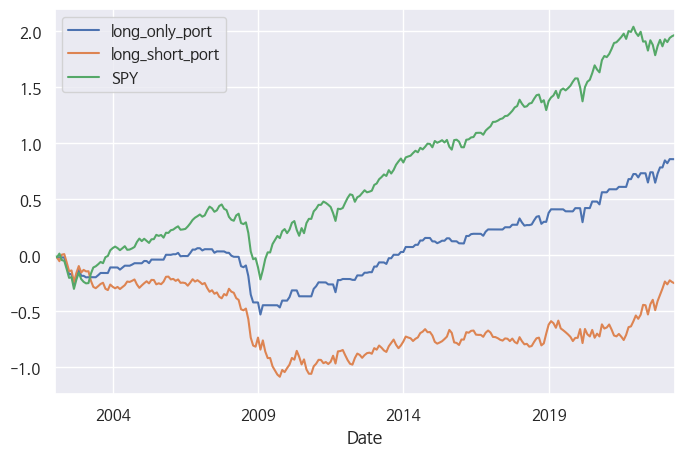

In [144]:
# # 백테스팅 결과 시각화

# plt.figure(figsize=(8, 5))
# long_only_port_rets.cumsum().plot(label='long_only_port')
# long_short_port_rets.cumsum().plot(label='long_short_port')
# SPY_data.cumsum().plot(label='SPY')
# plt.legend(loc='best')

# plt.show()

In [145]:
# SPY_data

Date
2002-01-01    0.000000
2002-02-01   -0.017936
2002-03-01    0.033271
2002-04-01   -0.058156
2002-05-01   -0.005933
                ...   
2023-01-01    0.062887
2023-02-01   -0.025143
2023-03-01    0.037078
2023-04-01    0.015975
2023-05-01    0.009833
Freq: MS, Name: spy, Length: 257, dtype: float64

In [146]:
# # 시장 국면에 따른 롱숏 전략 구현하기 위해 주 별 수익률이 양수일 떄는 경기 상승, 음수이거나 0일 때는 경기 하락으로 파악
# # 여기서는 시장 국면을 SPY 수익률로 지정. 양수이면 경기 상승, 음수이면 경기 하강으로 파악

# lst = []
# for sig1, sig2 in zip(SPY_data,intelligence_index): # 경기 국면 및 지능지수 
#     if sig1 >0 and sig2 >0: # 주식 매도 비율 상승 -> 매수
#         lst.append(1)
#     elif sig1 >0 and sig2 <= 0: # 주식 매도 비율 하락 -> 매도
#         lst.append(-1)
#     elif sig1 <= 0 and sig2 >0: # 주식 매수 비율 상승 -> 매도
#         lst.append(-1)
#     elif sig1 <= 0 and sig2 <= 0: # 주식 매수 비율 하락 -> 매수 
#         lst.append(1)
        
# tot_signal = pd.Series(lst)
# market_long_short_port_rets = (tot_signal.shift() * SPY_data - abs(tot_signal.diff()) * cost)

# plt.figure(figsize=(10, 5))
# market_long_short_port_rets.cumsum().plot(label='market_long_short_port_rets')
# SPY_data.cumsum().plot(label='SPY')
# plt.legend(loc='best')
# plt.show()



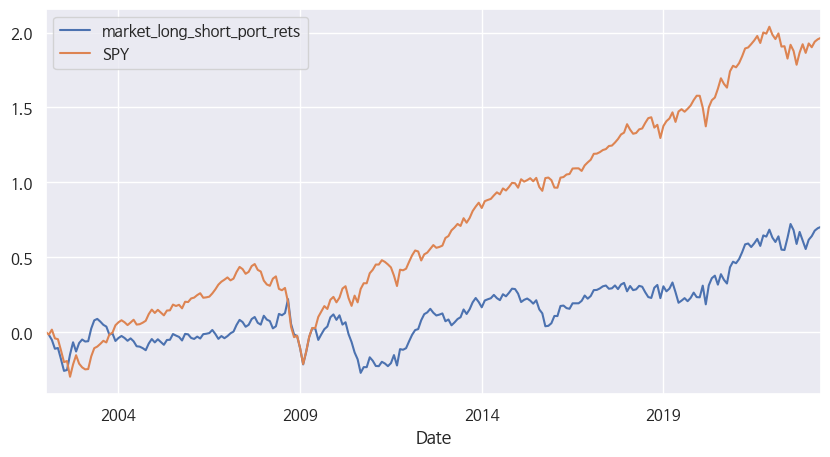

In [147]:
# # 시장 국면에 따른 롱숏 전략 구현하기 위해 주 별 수익률이 양수일 떄는 경기 상승, 음수이거나 0일 때는 경기 하락으로 파악
# # 여기서는 시장 국면을 SPY 수익률로 지정. 양수이면 경기 상승, 음수이면 경기 하강으로 파악

# lst = []
# for sig1, sig2 in zip(SPY_data,intelligence_index): # 경기 국면 및 지능지수 
#     if sig1 >0 and sig2 >0: # 주식 매도 비율 상승
#         lst.append(1)
#     elif sig1 >0 and sig2 <= 0: # 주식 매도 비율 하락
#         lst.append(-1)
#     elif sig1 <= 0 and sig2 >0: # 주식 매수 비율 상승
#         lst.append(-1)
#     elif sig1 <= 0 and sig2 <= 0: # 주식 매수 비율 하락
#         lst.append(1)
        
# tot_signal = pd.Series(lst, index=SPY_data.index)
# market_long_short_port_rets = (tot_signal.shift() * SPY_data - abs(tot_signal.diff()) * cost)

# plt.figure(figsize=(10, 5))
# market_long_short_port_rets.cumsum().plot(label='market_long_short_port_rets')
# SPY_data.cumsum().plot(label='SPY')
# plt.legend(loc='best')
# plt.show()



In [148]:
# # long_short_signal과 tot_signal의 값의 크기는 비슷하나 수익률에서 상당한 차이를 보임.

# print(tot_signal.value_counts())
# print(long_short_signal.value_counts())

# # 문제점: PCA를 통한 독립변수 추출하였기에 변수에 대한 설명을 하기 어려움. 유추할 수밖에 없음



In [149]:
# # long_short_signal과 tot_signal의 값의 크기는 비슷하나 수익률에서 상당한 차이를 보임.

# print(tot_signal.value_counts())
# print(long_short_signal.value_counts())

# # 문제점: PCA를 통한 독립변수 추출하였기에 변수에 대한 설명을 하기 어려움. 유추할 수밖에 없음



 1    178
-1     79
dtype: int64
-1    135
 1    122
Name: weighted_signal, dtype: int64


# 거시 경제 지표 활용 위해 데이터 월 단위로 추출

In [150]:
# # long_short_signal과 tot_signal의 값의 크기는 비슷하나 수익률에서 상당한 차이를 보임.

# print(tot_signal.value_counts())
# print(long_short_signal.value_counts())

# # 문제점: PCA를 통한 독립변수 추출하였기에 변수에 대한 설명을 하기 어려움. 유추할 수밖에 없음
# # 시장국면 분석을 단순히 SPY 수익률에 따라 경기 상승 하강으로 구분해서 시장국면 요소를 넣었을 때 수익률이 더 저조하게 나온건가?
# # 그럼 거시경제지표로 파악해보자.



In [151]:
# # long_short_signal과 tot_signal의 값의 크기는 비슷하나 수익률에서 상당한 차이를 보임.

# print(tot_signal.value_counts())
# print(long_short_signal.value_counts())

# # 문제점: PCA를 통한 독립변수 추출하였기에 변수에 대한 설명을 하기 어려움. 유추할 수밖에 없음



 1    178
-1     79
dtype: int64
-1    135
 1    122
Name: weighted_signal, dtype: int64


In [152]:
# def get_etf_price_data(tickers):
#   etf = yf.Tickers(tickers)
#   data = etf.history(start='2002-01-01', end='2023-05-28', actions=False) # actions=False -> capital gains, dividends, stock splits 정보 안들어옴
#   data.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True) # Close만 남겨둠
#   data = data.droplevel(0, axis=1)
#   data.ffill(inplace=True) 
#   df = data.resample('MS').first()
#   return df

# tickers = ['DEO', 'BUD', 'HEIO.AS', '0291.HK', 'RI.PA', 'TAP', '2502.T', 'TBVPF', 'KNBWY']
# alcohol_data = get_etf_price_data(tickers)

# tickers = ['SBUX', 'NSRGY', 'KO', 'TATACONSUM.NS']
# coffee_data = get_etf_price_data(tickers)

# tickers = ['PM', 'BTI', 'IMBBY', 'MO', '033780.KS', 'EML', 'ITC.NS', 'GODFRYPHLP.NS']
# smocking_data = get_etf_price_data(tickers)

# tickers = ['DUK', 'EXC', 'NEE', 'SO', 'D', 'AEP', 'XEL', 'ETR', 'PCG', 'PPL']
# electronic_data = get_etf_price_data(tickers)

ticker = 'SPY'
etf = yf.Ticker(ticker)
data = etf.history(start='2002-01-01', end='2023-05-28', actions=False) # actions=False -> capital gains, dividends, stock splits 정보 안들어옴
data.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True) # Close만 남겨둠
data.ffill(inplace=True) 
SPY_data = data.resample('MS').first()
# SPY_data.reset_index(inplace=True)
# SPY_data.drop(['Date'], axis=1, inplace=True)
# SPY_data = pd.Series(SPY_data.iloc[:,0])
SPY_data = SPY_data.pct_change().dropna()
SPY_data.index = pd.to_datetime(SPY_data.index).strftime("%Y-%m-%d")

print(SPY_data) 


In [153]:
# # 월 별 PCA_0 데이터 만들기

# alcohol_data.fillna(0, inplace=True)
# coffee_data.fillna(0, inplace=True)
# smocking_data.fillna(0, inplace=True)
# electronic_data.fillna(0, inplace=True)

# # 데이터 axis=1로 총 합 구하기 및 df 생성
# alcohol_sum = alcohol_data.sum(axis=1)
# coffee_sum = coffee_data.sum(axis=1)
# smocking_sum = smocking_data.sum(axis=1)
# electronic_sum = electronic_data.sum(axis=1) 

# df = pd.concat([alcohol_sum, coffee_sum, smocking_sum, electronic_sum], axis=1)

# df.rename(columns={0:'alcohol', 1:'coffee', 2:'smoking', 3:'electronic'}, inplace=True)


# # 칼럼 별 일주일 별 수익률 구하기 
# rets = df.pct_change().dropna()





# from factor_analyzer import FactorAnalyzer

# # 요인 분석 수행
# # 주성분 분석의 가정에 의해 3개 요인으로 분석
# fa = FactorAnalyzer(n_factors=3, rotation='varimax')
# fa.fit(rets)

# # 로드링 값 확인
# loadings = fa.loadings_
# df_fa = pd.DataFrame(loadings, index=rets.columns, columns = ['Factor 1', 'Factor 2', 'Factor 3'])
# # 각 변수와 해당 요인 간의 상관관계 계수를 나타낸 것이다. Factor 1은 coffee, electronic변수가 적재값이 가장 높은 것으로
# # 나타는다. 적재값이 높다는 것은 해당 변수들이 해당 요인으로 잘 설명된다는 의미이다. Factor 2는 smoking, Factor 3은 alcohol
# # 변수가 적재값이 가장 높게 나타낸다. 따라서 Factor 1~3요인으로 4개 변수를 3개로 축소할 수 있는 근거를 제시한다.

# # Factor 1~3 변수 및 spy 저장
# fa_scores = fa.transform(rets)
# df_fa = pd.DataFrame(fa_scores, columns=['Factor 1', 'Factor 2', 'Factor 3'], index=rets.index)



# weights = df_fa['Factor 1']

# intelligence_index = weights
# print(intelligence_index)



In [154]:
# 미국 거시경제지표 데이터 가져오기 및 병합
inflation = pd.read_csv('/home/joyeongmin/Downloads/CORESTICKM159SFRBATL.csv')
inflation = inflation.set_index('DATE')
inflation.index = pd.to_datetime(inflation.index)
#gdp = pd.read_csv('/home/joyeongmin/Downloads/GDP.csv')
#real_gdp = pd.read_csv('/home/joyeongmin/Downloads/GDPC1.csv')
unemployment_rate = pd.read_csv('/home/joyeongmin/Downloads/UNRATE.csv')
unemployment_rate = unemployment_rate.set_index('DATE')
unemployment_rate.index = pd.to_datetime(unemployment_rate.index)

interest_rate = pd.read_csv('/home/joyeongmin/Downloads/DFF.csv')
interest_rate = interest_rate.set_index('DATE')
interest_rate.index = pd.to_datetime(interest_rate.index)
interest_rate = interest_rate.resample('MS').first()

market_signal = pd.concat([inflation, unemployment_rate, interest_rate], axis=1)



In [155]:
# 3월 데이터까지 정제 및 스케일링
from sklearn.preprocessing import StandardScaler


market_signal.columns = ['inflation', 'unemployment_rate','interest_rate']
market_signal = market_signal.iloc[:-1,]
scaler = StandardScaler().fit(market_signal)
market_signal = pd.DataFrame(scaler.transform(market_signal), columns=market_signal.columns, index=market_signal.index)
print(market_signal)

            inflation  unemployment_rate  interest_rate
DATE                                                   
2002-01-01   1.096289          -0.136677       0.108645
2002-02-01   1.066417          -0.136677       0.268049
2002-03-01   1.007358          -0.136677       0.274426
2002-04-01   1.004700          -0.036092       0.338187
2002-05-01   0.990359          -0.086384       0.338187
...               ...                ...            ...
2022-11-01   4.019946          -1.192816       1.103329
2022-12-01   4.167044          -1.243108       1.581542
2023-01-01   4.103861          -1.293400       1.900351
2023-02-01   4.143402          -1.192816       1.900351
2023-03-01   4.000336          -1.243108       2.059755

[255 rows x 3 columns]


In [156]:
# 각 거시경제지표 가중치 부여
weight= {'inflation': 0.3, 'unemployment_rate': -0.2, 'interest_rate': -0.1}



market_signal['score'] = (market_signal['inflation'] * weight['inflation'] +\
                          market_signal['unemployment_rate'] * weight['unemployment_rate'] + \
                          market_signal['interest_rate'] * weight['interest_rate'])

#market_signal = market_signal.reset_index()
#market_signal = market_signal.drop('DATE', axis=1)
#market_signal.index = pd.to_datetime(market_signal.index, format="%Y-%m-%d")
print(market_signal)

            inflation  unemployment_rate  interest_rate     score
DATE                                                             
2002-01-01   1.096289          -0.136677       0.108645  0.345358
2002-02-01   1.066417          -0.136677       0.268049  0.320456
2002-03-01   1.007358          -0.136677       0.274426  0.302100
2002-04-01   1.004700          -0.036092       0.338187  0.274810
2002-05-01   0.990359          -0.086384       0.338187  0.280566
...               ...                ...            ...       ...
2022-11-01   4.019946          -1.192816       1.103329  1.334214
2022-12-01   4.167044          -1.243108       1.581542  1.340581
2023-01-01   4.103861          -1.293400       1.900351  1.299803
2023-02-01   4.143402          -1.192816       1.900351  1.291549
2023-03-01   4.000336          -1.243108       2.059755  1.242747

[255 rows x 4 columns]


In [157]:
# # 거시경제지표 및 지능지수를 통해 매수 매도 포지션 선정 후 수익률 계산, 그러나 수익률 저조...
# lst = []
# for sig1, sig2 in zip(market_signal['score'],intelligence_index): # 경기 국면 및 지능지수 
#     if sig1 >0 and sig2 >0: # 주식 매도 비율 상승 -> 매수
#         lst.append(1)
#     elif sig1 >0 and sig2 <0: # 주식 매도 비율 하락 -> 매도
#         lst.append(-1)
#     elif sig1 < 0 and sig2 >0: # 주식 매수 비율 상승 -> 매도
#         lst.append(-1)
#     elif sig1 < 0 and sig2 <0: # 주식 매수 비율 하락 -> 매수 
#         lst.append(1)
        
# tot_signal = pd.Series(lst)
# cost = 0.0005
# market2_long_short_port_rets = (tot_signal.shift() * SPY_data - abs(tot_signal.diff()) * cost)

# market2_long_short_port_rets.fillna(0, inplace=True)

# plt.figure(figsize=(10, 5))
# market2_long_short_port_rets.cumsum().plot(label='market2_long_short_port_rets')
# SPY_data.cumsum().plot(label='SPY_rets')
# plt.legend(loc='best')
# plt.show()

In [158]:
market_signal

,inflation,unemployment_rate,interest_rate,score
DATE,,,,
2002-01-01,1.096289,-0.136677,0.108645,0.345358
2002-02-01,1.066417,-0.136677,0.268049,0.320456
2002-03-01,1.007358,-0.136677,0.274426,0.302100
2002-04-01,1.004700,-0.036092,0.338187,0.274810
2002-05-01,0.990359,-0.086384,0.338187,0.280566
...,...,...,...,...
2022-11-01,4.019946,-1.192816,1.103329,1.334214
2022-12-01,4.167044,-1.243108,1.581542,1.340581
2023-01-01,4.103861,-1.293400,1.900351,1.299803


In [159]:
intelligence_index

Date
2002-01-01   -0.007488
2002-02-01    0.005377
2002-03-01    0.025698
2002-04-01    0.019468
2002-05-01   -0.024438
                ...   
2023-01-01   -0.018752
2023-02-01   -0.023689
2023-03-01    0.011918
2023-04-01    0.028518
2023-05-01   -0.024773
Freq: MS, Name: weighted_signal, Length: 257, dtype: float64

In [166]:
SPY_data2 = pd.DataFrame(SPY_data)
SPY_data2.columns = ['Close']
SPY_data2

,Close
Date,
2002-01-01,0.000000
2002-02-01,-0.017936
2002-03-01,0.033271
2002-04-01,-0.058156
2002-05-01,-0.005933
...,...
2023-01-01,0.062887
2023-02-01,-0.025143
2023-03-01,0.037078


In [167]:
SPY_data = SPY_data2

/tmp/ipykernel_31621/1840010058.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY_data['tot_signal'] = tot_signal


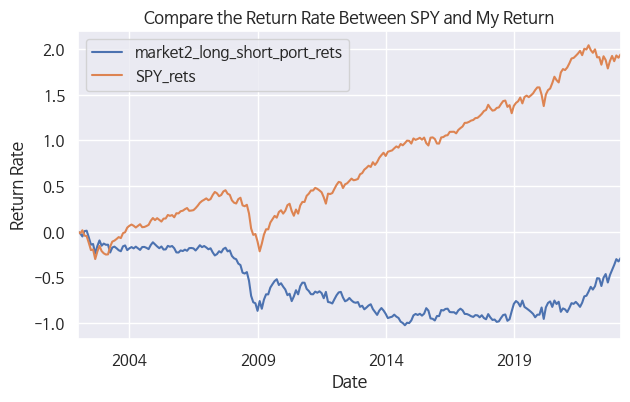

In [168]:
# 거시경제지표 및 지능지수를 통해 매수 매도 포지션 선정 후 수익률 계산, 그러나 수익률 저조...
lst = []
for sig1, sig2 in zip(market_signal.iloc[:,-1],intelligence_index[:-2]): # 경기 국면 및 지능지수 
    if sig1 >0 and sig2 >0: # 주식 매도 비율 상승
        lst.append(-1)
    elif sig1 >0 and sig2 <0: # 주식 매도 비율 하락
        lst.append(1)
    elif sig1 < 0 and sig2 >0: # 주식 매수 비율 상승
        lst.append(1)
    elif sig1 < 0 and sig2 <0: # 주식 매수 비율 하락
        lst.append(-1)
        
tot_signal = pd.Series(lst, index=intelligence_index[:-2].index)
cost = 0.0005

SPY_data = SPY_data.iloc[:-2,]
SPY_data

SPY_data['tot_signal'] = tot_signal

merged_data = SPY_data
market2_long_short_port_rets = (merged_data['tot_signal'].shift() * merged_data['Close'] - abs(merged_data['tot_signal'].diff()) * cost)

market2_long_short_port_rets.fillna(0, inplace=True)

plt.figure(figsize=(7, 4))
market2_long_short_port_rets.cumsum().plot(label='market2_long_short_port_rets')
SPY_data['Close'].cumsum().plot(label='SPY_rets')
plt.legend(loc='best')
plt.ylabel("Return Rate")
plt.title("Compare the Return Rate Between SPY and My Return")
plt.show()

# 경제지표 가중치 달리해서 그려보기

In [162]:
# 다른 가중치 여러 차례 시도 해보았으나 0.3, -0.2, -0.1에서 가장 높은 수익률을 보임.
# 인덱스 펀드를 이기기가 어렵다는 걸 알게 됨. 
 